#  Lucelia Lima Souza

In [1]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# leitura dos dados csv
df = pd.read_csv("/content/drive/MyDrive/Bootcamp Data Analytcs/dataset/populacao_brasileira.csv", sep = ",")

# Excluir a coluna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

df

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...
995,AC,22,Médio,Básico,2852.40,F
996,PE,40,Fundamental,Básico,2533.96,M
997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,RS,61,Fundamental,Avançado,3513.60,F


In [4]:
# Verificar valores nulos em todo o DataFrame
df.isnull().sum()

estado                             0
idade                              0
escolaridade                       0
nível de proficiência em inglês    0
renda                              0
sexo                               0
dtype: int64

## 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quemtemonível avançado.

In [5]:
# Contar o número de pessoas não fluentes em inglês (não avançado)
nao_fluentes_ingles = df[df['nível de proficiência em inglês'] != 'Avançado'].shape[0]

# Contar o número total de pessoas no DataFrame
total_pessoas = df.shape[0]

# Calcular a proporção de pessoas não fluentes em inglês
proporcao_nao_fluentes = nao_fluentes_ingles / total_pessoas

# Exibir a probabilidade de escolher uma pessoa aleatória e ela não ser fluente em inglês
print("A probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês é de:", proporcao_nao_fluentes)

A probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês é de: 0.656


*   Isso significa que, de acordo com os dados fornecidos, há uma probabilidade de aproximadamente 65.6% de escolhermos uma pessoa aleatória que não seja fluente em inglês.




## 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [6]:
# Filtrar pessoas de Alagoas ou do Pará com renda superior a 5 mil reais
alagoas_para_renda_acima_5mil = df[((df['estado'] == 'AL') | (df['estado'] == 'PA')) & (df['renda'] > 5000)]

# Contar o número de pessoas de Alagoas ou do Pará
total_alagoas_para = df[df['estado'].isin(['AL', 'PA'])].shape[0]

# Calcular o número de pessoas de Alagoas ou do Pará com renda superior a 5 mil reais
renda_acima_5mil = alagoas_para_renda_acima_5mil.shape[0]

# Calcular a probabilidade
probabilidade = renda_acima_5mil / total_alagoas_para

# Exibir a probabilidade com duas casas decimais
print("A probabilidade de uma pessoa escolhida aleatoriamente de Alagoas ou do Pará ter uma renda superior a 5 mil reais é de: {:.4f}".format(probabilidade))

A probabilidade de uma pessoa escolhida aleatoriamente de Alagoas ou do Pará ter uma renda superior a 5 mil reais é de: 0.0506


*   O resultado 0.0506 indica que a probabilidade de uma pessoa escolhida aleatoriamente de Alagoas ou do Pará ter uma renda superior a 5 mil reais é de aproximadamente 5.06%




## 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [7]:
# Filtrar pessoas do estado do Amazonas com ensino superior completo ou pós-graduação
amazonas_ensino_superior_completo = df[(df['estado'] == 'AM') & ((df['escolaridade'] == 'Superior') | (df['escolaridade'] == 'Pós-graduação'))]

# Contar o número total de pessoas do Amazonas
total_amazonas = df[df['estado'] == 'AM'].shape[0]

# Calcular a probabilidade
probabilidade = len(amazonas_ensino_superior_completo) / total_amazonas

p = probabilidade
k = 1  # Indivíduo com ensino superior
n = 5  # Total de pessoas que vou cumprimentar

# PMF para calcular probability exata
probabilidade_quinta_pessoa = binom.pmf(k, n, p)
#print(probabilidade_quinta_pessoa)

# Exibir a probabilidade
print("A probabilidade de uma pessoa do Amazonas ter ensino superior completo ou pós-graduação é de: {:.5f}".format(probabilidade_quinta_pessoa))

A probabilidade de uma pessoa do Amazonas ter ensino superior completo ou pós-graduação é de: 0.11068



*   Há uma probabilidade de aproximadamente 11.06% da quinta pessoa escolhida  aleatoriamente do estado do Amazonas ter ensino superior



## 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

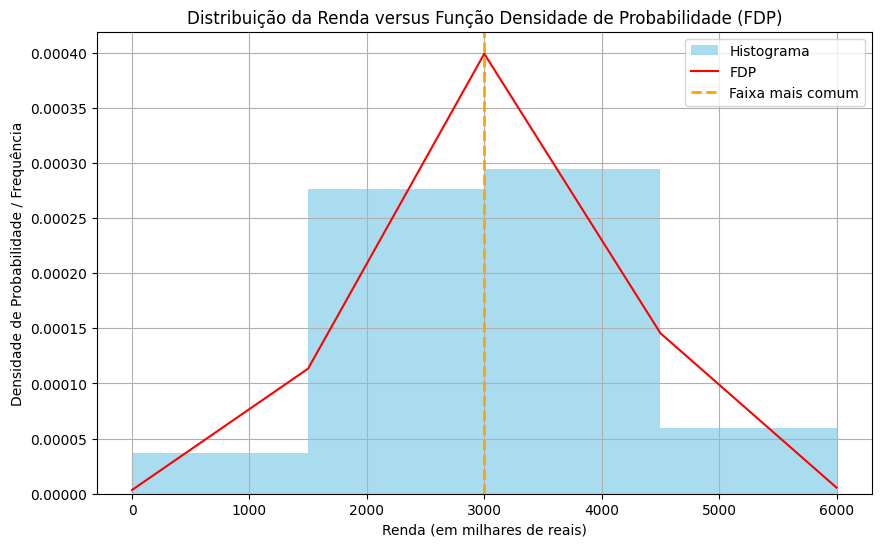

Contagem por faixa de renda:
faixa_renda
(0, 1500]        55
(1500, 3000]    414
(3000, 4500]    442
(4500, 6000]     89
Name: count, dtype: int64


In [8]:
# Definir faixas de renda
faixas_renda = [0, 1500, 3000, 4500, 6000]

# Criar uma nova coluna no DataFrame com as categorias de renda
df['faixa_renda'] = pd.cut(df['renda'], bins=faixas_renda)

# Contar o número de pessoas em cada faixa de renda
contagem_por_faixa = df['faixa_renda'].value_counts().sort_index()

# Calcular o histograma da renda
hist, bins = np.histogram(df['renda'], bins=faixas_renda, density=True)

# Encontrar a faixa com a maior densidade de probabilidade (FDP)
indice_maior_fdp = np.argmax(hist)
faixa_mais_comum = (bins[indice_maior_fdp], bins[indice_maior_fdp + 1])

# Calcular a função densidade de probabilidade (FDP) da renda usando uma distribuição normal
media_renda = df['renda'].mean()
desvio_padrao_renda = df['renda'].std()
pdf_renda = norm.pdf(bins, loc=media_renda, scale=desvio_padrao_renda)

# Plotar o histograma da renda
plt.figure(figsize=(10, 6))
plt.hist(df['renda'], bins=faixas_renda, density=True, color='skyblue', alpha=0.7, label='Histograma')

# Plotar a função densidade de probabilidade (FDP) da renda
plt.plot(bins, pdf_renda, 'r-', label='FDP')

# Destacar a faixa mais comum
plt.axvline(x=faixa_mais_comum[0], color='orange', linestyle='--', linewidth=2, label='Faixa mais comum')

# Configurações do gráfico
plt.title('Distribuição da Renda versus Função Densidade de Probabilidade (FDP)')
plt.xlabel('Renda (em milhares de reais)')
plt.ylabel('Densidade de Probabilidade / Frequência')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()

# Exibir a contagem por faixa de renda
print("Contagem por faixa de renda:")
print(contagem_por_faixa)

## 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

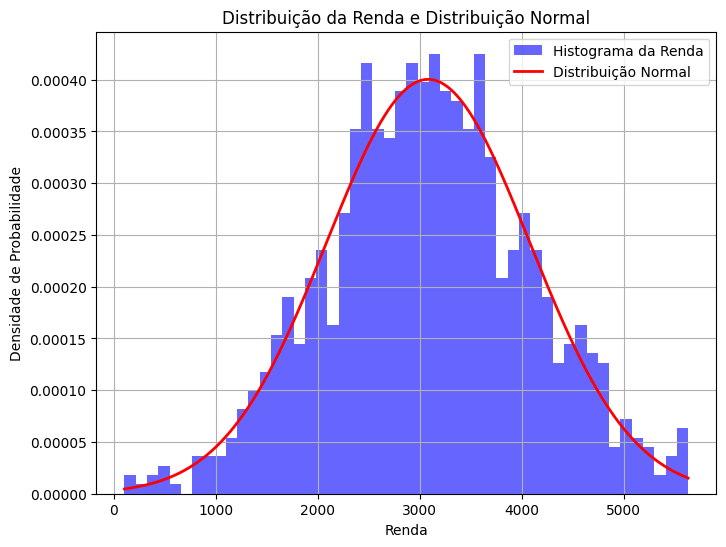

Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


In [9]:
# Calcular a média e a variância da renda da amostra
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

# Criar a distribuição normal
dist_normal = norm(loc=media_renda, scale=np.sqrt(variancia_renda))

# Gerar valores para o eixo x
x = np.linspace(df['renda'].min(), df['renda'].max(), 1000)

# Plotar histograma da renda
plt.figure(figsize=(8, 6))
plt.hist(df['renda'], bins=50, density=True, alpha=0.6, color='blue', label='Histograma da Renda')

# Plotar a distribuição normal
plt.plot(x, dist_normal.pdf(x), 'r-', lw=2, label='Distribuição Normal')

plt.title('Distribuição da Renda e Distribuição Normal')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

# Exibir média e variância da renda
print("Média da renda:", media_renda)
print("Variância da renda:", variancia_renda)

## 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [10]:
# Calcular o tamanho da população
populacao = len(df)

# Número de pessoas com pós-graduação na amostra inicial
populacao_pos_graduacao = len(df[df['escolaridade'] == 'Pós-graduação'])

# Probabilidade de selecionar uma pessoa com pós-graduação na amostra inicial
prob_pos_graduacao = populacao_pos_graduacao / populacao

# Novo tamanho da amostra (n = 1 milhão)
n = 1000000

# Número de sucessos desejados (243 mil pessoas com pós-graduação)
k = 243000

# Calcular a probabilidade usando a distribuição binomial e a probabilidade calculada da amostra inicial (prob_pos_graduacao)
probabilidade = binom.pmf(k, n, prob_pos_graduacao)

print("A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes é:", probabilidade)

A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes é: 1.1104854289794913e-119


*    Esse resultado, indica uma probabilidade extremamente baixa. Isso significa que a probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes é praticamente zero.




## 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [11]:
# Calcular a contagem de ocorrências de cada nível de escolaridade
contagem_escolaridade = df['escolaridade'].value_counts()

# Calcular a densidade de probabilidade para cada nível de escolaridade
densidade_probabilidade = contagem_escolaridade / len(df)

# Calcular a função de densidade acumulada discreta para cada nível de escolaridade
densidade_acumulada = densidade_probabilidade.cumsum()

# Criar um DataFrame para armazenar os resultados
df_densidade_acumulada = pd.DataFrame({'Escolaridade': densidade_acumulada.index, 'Densidade Acumulada': densidade_acumulada.values})

# Exibir o DataFrame com a função de densidade acumulada discreta para cada nível de escolaridade
print(df_densidade_acumulada)

    Escolaridade  Densidade Acumulada
0    Fundamental                0.266
1  Pós-graduação                0.519
2       Superior                0.762
3          Médio                1.000


## 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [12]:
# Nível de confiança de 95%
confidence_level = 0.95

# Valor crítico da distribuição normal para o nível de confiança desejado
Z = norm.ppf((1 + confidence_level) / 2)

# Suponha que 'p' seja a proporção de pessoas com nível de inglês intermediário na população
proficiencia_ingles = df['nível de proficiência em inglês']
p = proficiencia_ingles.value_counts(normalize=True).get('Intermediário', 0)

# Suponha que 'n' seja o tamanho da amostra
n = len(df)

# Número de pessoas com nível de inglês intermediário
num_intermediario = proficiencia_ingles.eq('Intermediário').sum()

# Probabilidade de pessoas sem nível intermediário
prob_sem_intermediario = 1 - p

# Calcular a margem de erro amostral
margem_erro = Z * np.sqrt((p * prob_sem_intermediario) / n)

print("Número de pessoas com nível de inglês intermediário:", num_intermediario)
print("Probabilidade de pessoas sem nível intermediário:", prob_sem_intermediario)
print("Valor crítico de Z para 95% de confiança:", Z)
print("A margem de erro amostral da proporção populacional é:", margem_erro)

Número de pessoas com nível de inglês intermediário: 329
Probabilidade de pessoas sem nível intermediário: 0.671
Valor crítico de Z para 95% de confiança: 1.959963984540054
A margem de erro amostral da proporção populacional é: 0.029121068108804226


*   Isso significa que, com um nível de confiança de 95%, espera que a proporção amostral de pessoas com nível de inglês intermediário esteja dentro de ± 0.0291 ou 2.91% da proporção verdadeira na população.

## 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [25]:
# Calcular a média e o desvio padrão da renda da população
media_renda = df['renda'].mean()
desvio_padrao_renda = df['renda'].std()

# 2. Calcular a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média
probabilidade = 1 - norm.cdf(media_renda + 1000, loc=media_renda, scale=desvio_padrao_renda) ** 60

print("A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média da população é:", probabilidade)

A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média da população é: 0.9999665682720793


*   Com base na distribuição normal da renda da população, é extremamente provável encontrar 60 pessoas cuja renda seja superior à média da população em mil reais. Essa probabilidade muito próxima de 1 (ou 100%) indica que é altamente improvável que, ao escolher aleatoriamente 60 pessoas da população, não encontremos pelo menos 60 pessoas com uma renda mil reais superior à média.

## 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2mil reais por mês?

In [21]:
# Filtrar o DataFrame para selecionar apenas as pessoas do Sudeste que sejam homens com ensino fundamental
filtro = (df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) & (df['sexo'] == 'M') & (df['escolaridade'] == 'Fundamental')
pessoas_sudeste_homem_fundamental = df[filtro]

# Calcular a probabilidade de encontrar alguém com renda maior que 2 mil reais por mês
probabilidade_renda_maior_2mil = (pessoas_sudeste_homem_fundamental['renda'] > 2000).mean()

# Definir o valor crítico do nível de confiança usando a distribuição normal padrão (para um nível de confiança de 95%)
Z = norm.ppf(1 - probabilidade_renda_maior_2mil / 2)

print("A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de:", probabilidade_renda_maior_2mil)

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de: 1.0


*   Uma probabilidade de 1.0 indica certeza absoluta, o que significa que, com base nos critérios especificados (ser do sexo masculino, ter ensino fundamental e renda superior a 2 mil reais), é garantido encontrar pelo menos uma pessoa no Sudeste com essas características ao fazer uma escolha aleatória.